In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [110]:
A = 0
B = 5
N = 100
EPS = 1.7*10e-2
def f(x):
    tmp = np.random.normal(0, EPS)
    return  x + 10.2*np.cos(x) - np.sin(x) + tmp *10

In [111]:
x = np.linspace(A,B,N)
x

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [112]:
y = list(map(f, x))
y

[9.773431951758825,
 7.452962035161157,
 8.782629590289538,
 10.18209833139532,
 9.137939327824228,
 8.781857303639912,
 9.940126402427296,
 12.71278684077477,
 7.647040185992194,
 8.131989142845878,
 7.1464675376176405,
 10.401496010765397,
 13.350332485250455,
 6.170444838569072,
 10.316738542862474,
 8.15051462302819,
 7.13493555209353,
 10.072834590907327,
 4.947428206833702,
 8.235520591831483,
 4.853888596240589,
 5.8474165841403245,
 8.316802401891223,
 5.923492944298758,
 4.928568152603798,
 2.3072345990835474,
 2.3098814939386636,
 4.034918064808032,
 3.1581763212455356,
 -0.5882774358538143,
 -0.159147955406854,
 2.2532760873348687,
 -0.22808159928768912,
 -1.5582452592918257,
 -2.7205705012453594,
 -1.6050697975012345,
 -2.767679206246398,
 0.44228047637144785,
 0.32890107313625094,
 -3.956593382599457,
 -2.2336005647108816,
 -4.374943757640789,
 -8.870649874287343,
 -4.344279189320151,
 -3.960133677156844,
 -5.908078403012939,
 -9.422650108541283,
 -8.721257324871054,
 -3.5

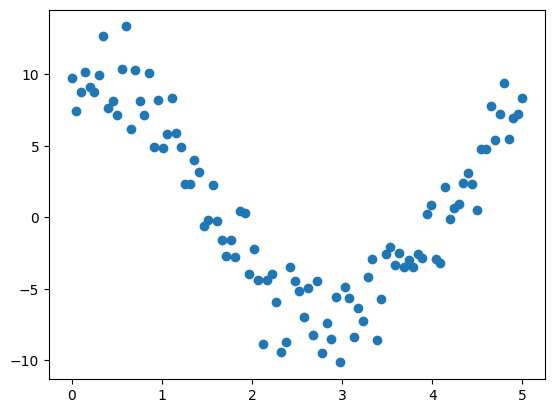

In [113]:
plt.scatter(x,y)

In [114]:
def polyfit_custom(x, y, deg):
    # Ensure x and y have the same length
    if len(x) != len(y):
        raise ValueError("Input arrays x and y must have the same length")

    # Create the Vandermonde matrix
    A = np.vander(x, deg + 1)

    # Solve the linear system of equations
    coefficients = np.linalg.lstsq(A, y, rcond=None)[0]

    return coefficients

In [115]:
pf = polyfit_custom(x,y,4)
pf

array([ -0.42988833,   4.86989433, -15.39164749,   8.83003045,
         8.44244335])

In [116]:
def poly_from_fit(numbers,x):
    t =  x**(len(numbers) - 1)

    if x == 0:
        return numbers[-1]
    if len(numbers)>0:
        answer = []
        for i in range(len(numbers)):
            
            answer.append(t*numbers[i])
            t /= x
        return np.sum(answer)
    else:
        return numbers
            

In [117]:
answer_poly = [poly_from_fit(pf,i) for i in x]


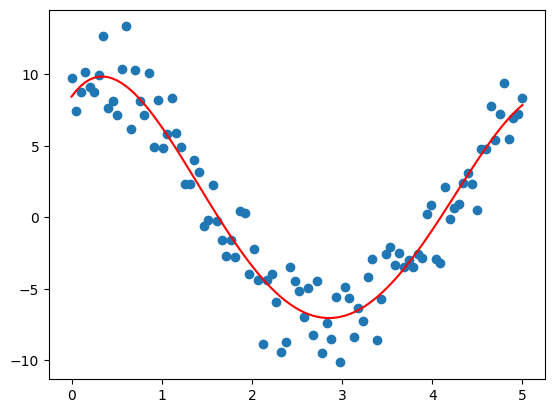

In [118]:
plt.plot(x, answer_poly, c="r")
plt.scatter(x,y)
plt.show()

In [119]:
def generate_func(x):
    return  np.array([1, x, np.sin(x), np.cos(x)])

def funcfit_custom(x, y):
    # Ensure x and y have the same length
    if len(x) != len(y):
        raise ValueError("Input arrays x and y must have the same length")

    A = np.array([generate_func(i) for i in x])
    # Solve the linear system of equations
    coefficients = np.linalg.lstsq(A, y, rcond=None)[0]

    return coefficients

In [120]:
pdf= funcfit_custom(x,y)
pdf

array([ 0.57959332,  0.88052554, -1.35905813,  9.91462425])

In [121]:
def from_funcfit(numbers,x):
    return generate_func(x) @numbers
        


In [122]:
answer_func = [from_funcfit(pdf,i) for i in x]


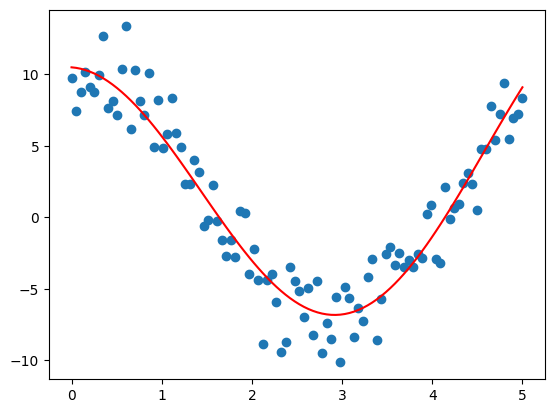

In [123]:
plt.plot(x, answer_func, c="r")
plt.scatter(x,y)
plt.show()